In [1]:
import numpy as np
import cv2
import  imutils
import sys
import pytesseract
import pandas as pd
import time

import matplotlib.pyplot as plt

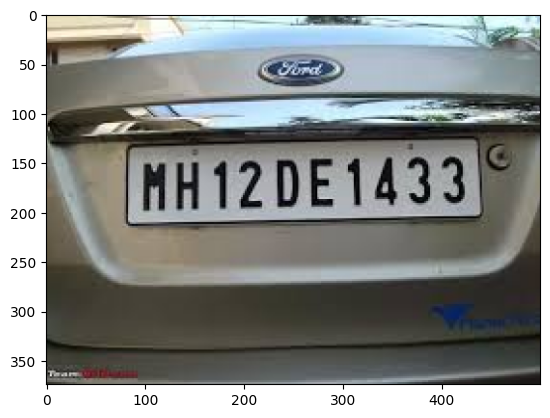

In [2]:
image = cv2.imread('imgs/car.jpeg')
image = imutils.resize(image, width=500)
#cv2.imshow("Original Image", image)
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#cv2.imshow("1 - Grayscale Conversion", gray)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

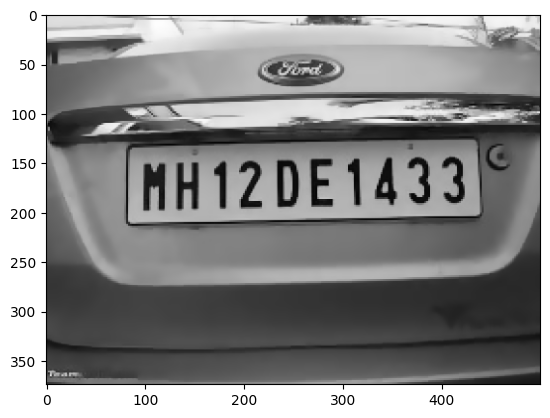

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = cv2.bilateralFilter(gray, 11, 17, 17)

plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.gray()

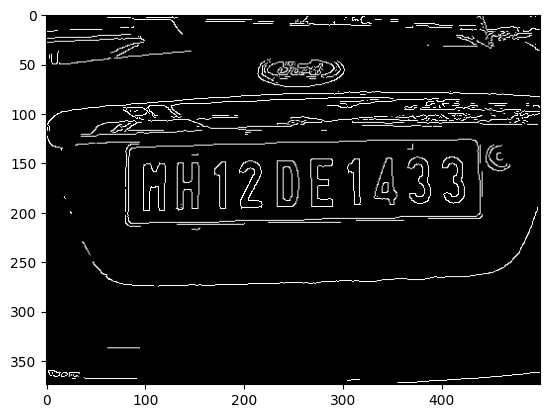

In [4]:
edged = cv2.Canny(gray, 170, 200)

plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.gray()

In [5]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30] 

NumberPlateCnt=
[[[436 133]]

 [[ 86 135]]

 [[ 83 209]]

 [[434 204]]]


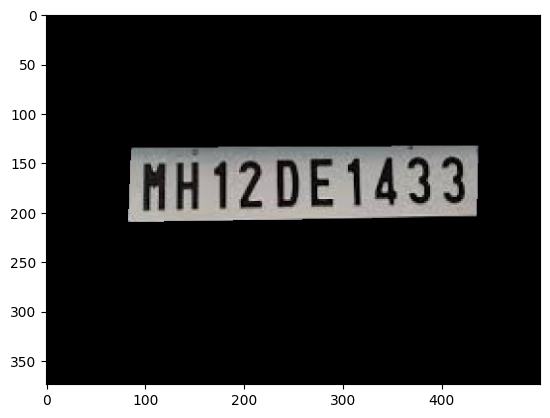

In [6]:
NumberPlateCnt = None 
count = 0
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        NumberPlateCnt = approx 
        break
print(f"NumberPlateCnt=\n{NumberPlateCnt}")
# Masking the part other than the number plate
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[NumberPlateCnt],0,255,-1)
new_image = cv2.bitwise_and(image,image,mask=mask)

plt.imshow(new_image)
plt.gray()

In [7]:
# Configuration for tesseract
config = ('-l eng --oem 1 --psm 3')
# Run tesseract OCR on image (apt install tesseract-ocr)
text = pytesseract.image_to_string(new_image, config=config)

print(text)

MH1IZDE1433

